Lab 2

We are looking at a gamma ray source. With a telascope that has a backround of cosmic-ray that has a descreat poison distibuiton. 
Lets take the avrage dally cosmic ray backorund is 3 and the number of gamma rays of the souce we are looking at emited on avrage per day is 10

1. A)
We will first set up a plot the backound discribed above


In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
import seaborn as sb
from fractions import Fraction 

plt.rcParams["figure.figsize"] = (15,10)

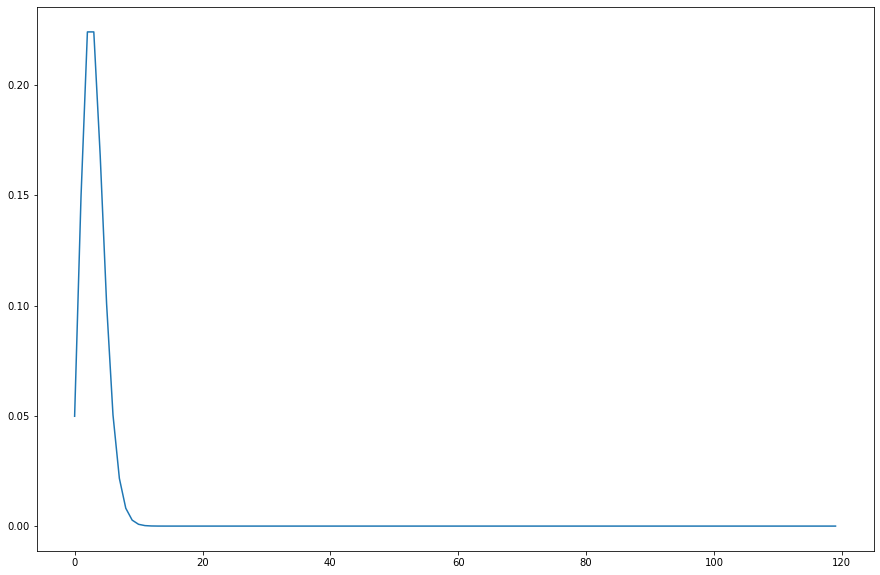

In [47]:
#lets set up a posion distuboing

#x = np.arange(stats.poisson.pmf(0.01, mu),stats.poisson.ppf(0.99, mu))
mu = 3
x=list(range(120))
Background = scipy.stats.poisson.pmf(x,mu)
#xAx=x*n
#Backgound = stats.poisson.rvs(mu, size=100)
plt.plot(Background)
plt.show()

In [48]:
def multiconvolve (x,n):
    Backgound=x
    
    if n <= 1:
        return (signal)
   
    con = signal.convolve(Backgound,Backgound) 
    for i in range(0, n-2):
        con = signal.convolve(con,Backgound) 
        i+=1
    con = np.append(con,[0]*(n-1))    
    return(con)

Now lets look at how how this backound veary over days of obsevaions, we exoect it to spred out and become mor gousian looking, as we can see below

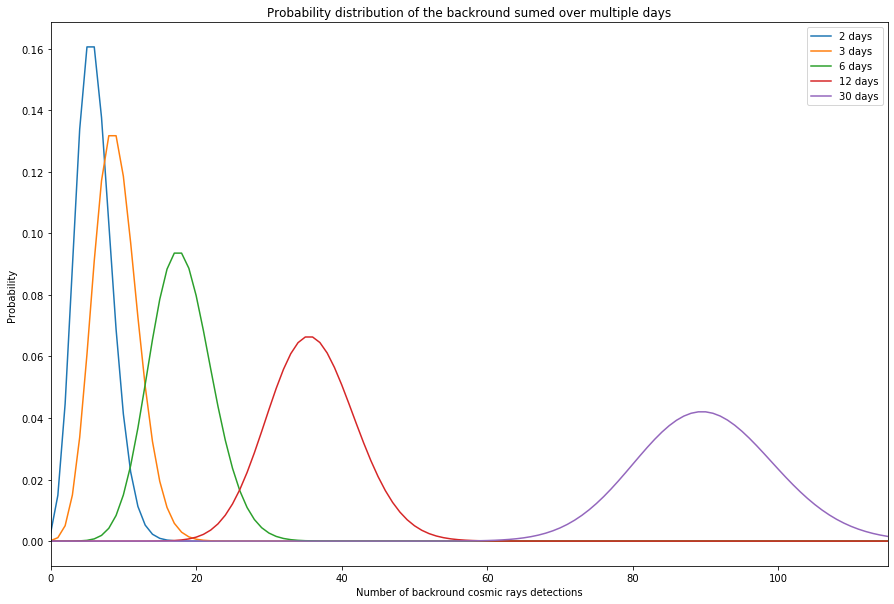

In [49]:
twoDays = multiconvolve(Background,2)
threeDays = multiconvolve(Background,3)
sixDays =  multiconvolve(Background,6)
twelveDays =  multiconvolve(Background,12)
thirtyDays =  multiconvolve(Background,30)
plt.plot(twoDays, label ='2 days')
plt.plot(threeDays, label = '3 days')
plt.plot(sixDays, label = '6 days')
plt.plot(twelveDays, label = "12 days")
plt.plot(thirtyDays,label= "30 days")
plt.xlim([0,115])
plt.xlabel('Number of backround cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the backround sumed over multiple days')
plt.legend()
plt.show()

B)


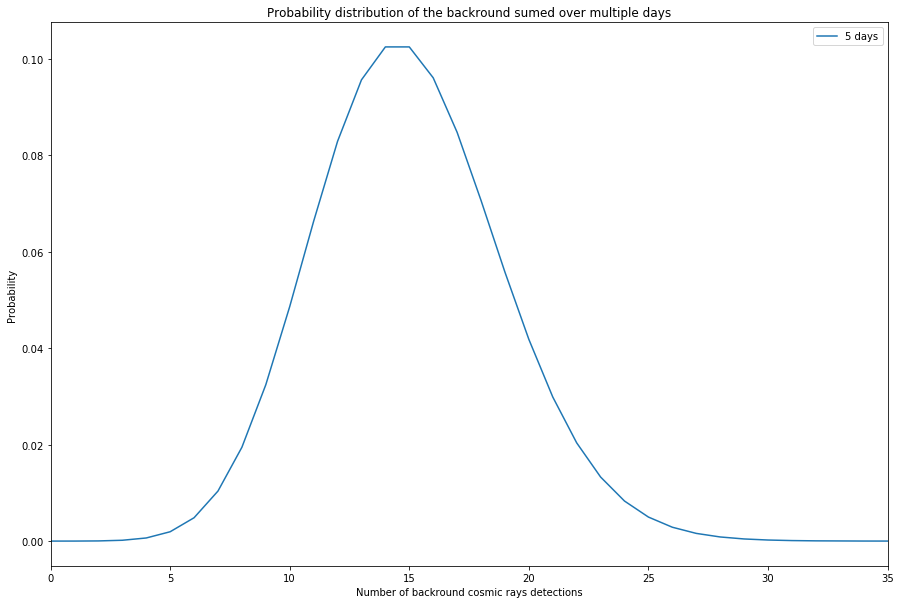

In [50]:
fiveDays =  multiconvolve(Background,5)
plt.plot(fiveDays, label ='5 days')
plt.xlabel('Number of backround cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the backround sumed over multiple days')
plt.legend()
plt.xlim([0,35])
plt.show()

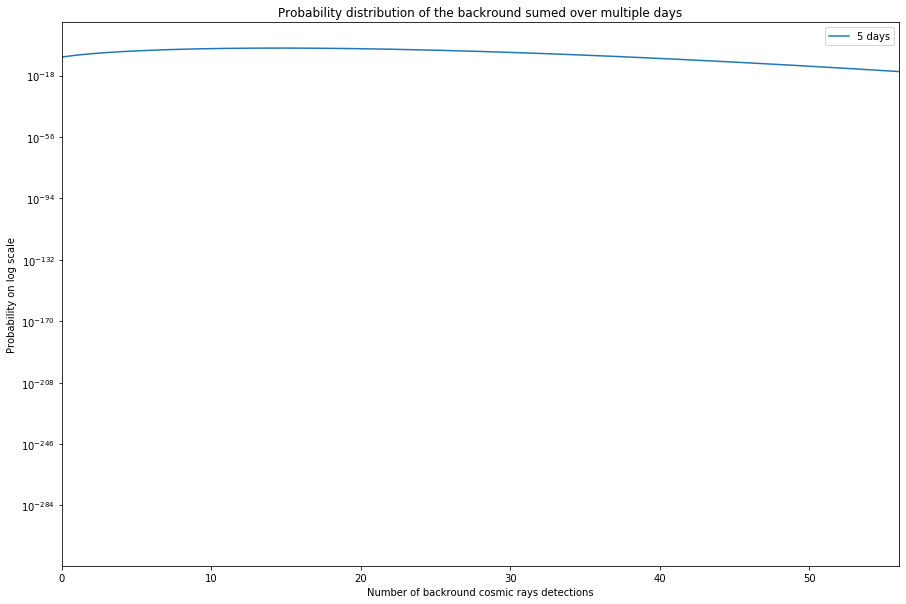

In [51]:
plt.plot(fiveDays, label ='5 days')
plt.xlabel('Number of backround cosmic rays detections')
plt.ylabel('Probability on log scale')
plt.title('Probability distribution of the backround sumed over multiple days')
plt.legend()
plt.yscale('log')
plt.xlim([0,56])
plt.show()

C)

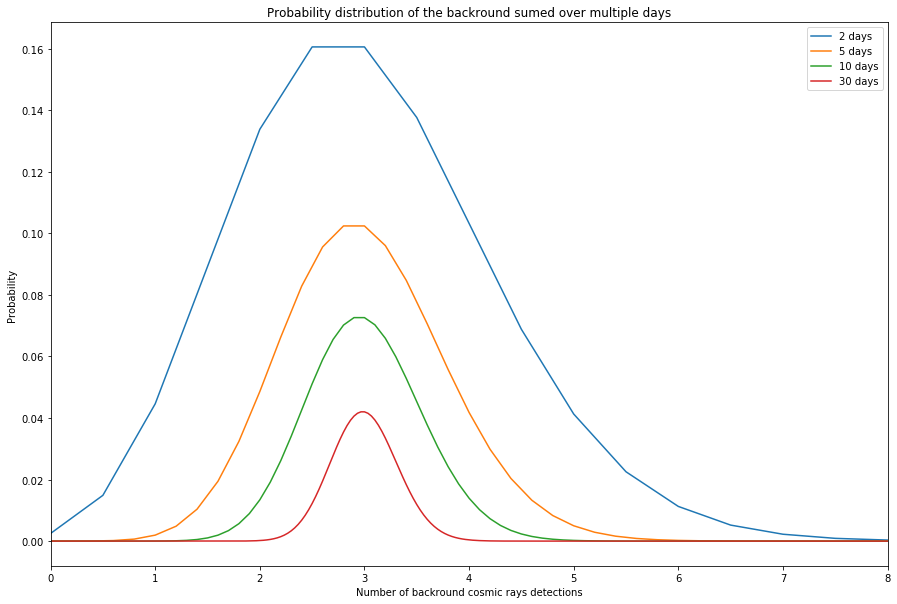

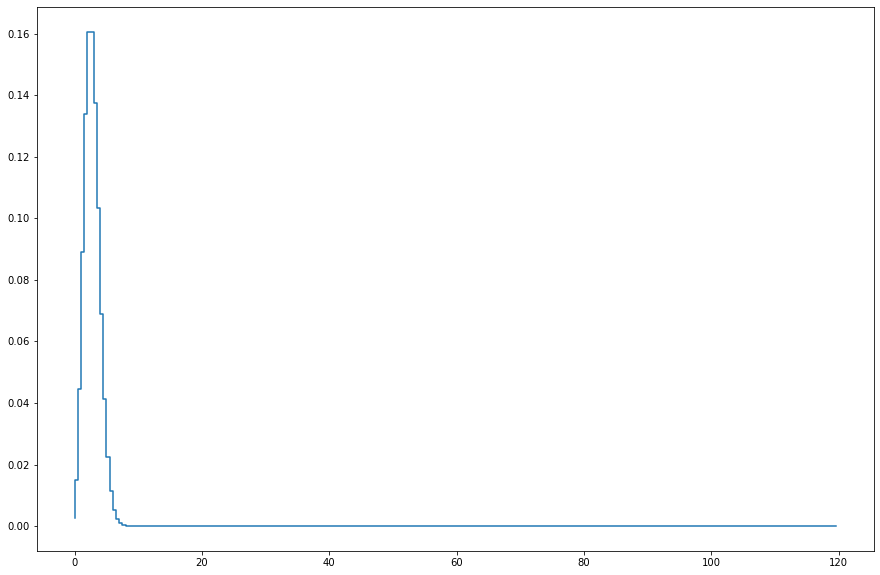

In [97]:
mu = 3
#x=list(range(12))
x = np.array(list(range(120)))
Background = scipy.stats.poisson.pmf(x,mu)
n=2
twodaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(twodaysAve[0],twodaysAve[1], label ='2 days')
n=5
fivedaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(fivedaysAve[0],fivedaysAve[1], label ='5 days')

n=10
tendaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(tendaysAve[0],tendaysAve[1], label ='10 days')

n=30
thirtydaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(thirtydaysAve[0],thirtydaysAve[1], label ='30 days')

plt.xlabel('Number of backround cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the backround sumed over multiple days')
plt.legend()
plt.xlim([0,8])
plt.show()

plt.matplotlib.pyplot.step(twodaysAve[0],twodaysAve[1])

D) 
Lets say after two days of observations we want to know what is the sigma associated with the probability of seeing 24 or more signals from the background distribution.

In [66]:
twoDaycmf = scipy.integrate.cumtrapz(twodaysAve[1])
P = twoDaycmf[20]
print('We get a simga of',stats.norm.ppf(P))


We get a simga of 3.025698147992259


2.
Lets say we have a backound distiboun of a rayligh that has scale of 10  
A)
Lets look at how a sckewed distribution such as the Rayleigh change as we avrage over dyas 


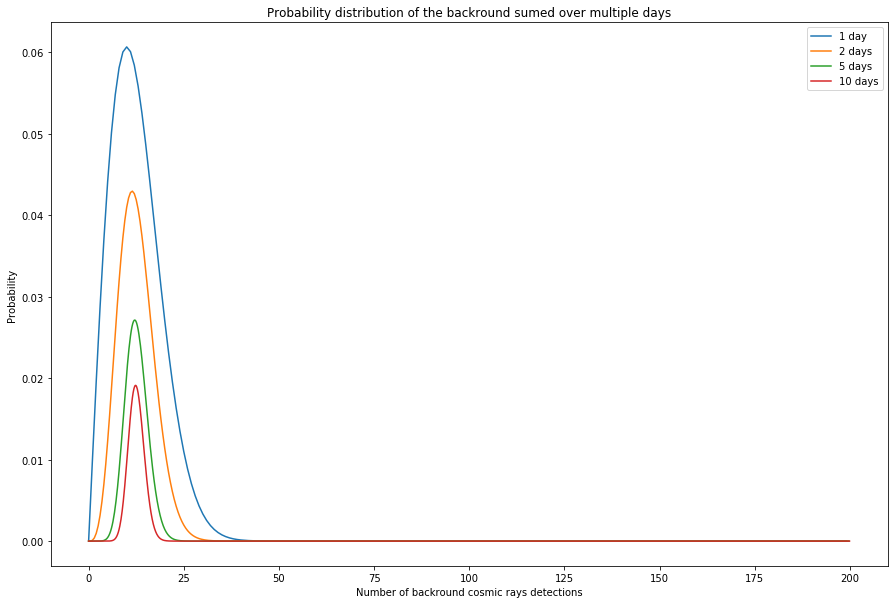

In [67]:
x = list(range(200))
Background = scipy.stats.rayleigh.pdf(x,scale = 10)
plt.plot(Background, label = "1 day")
n=2
twodaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(twodaysAve[0],twodaysAve[1], label ='2 days')
n=5
fivedaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(fivedaysAve[0],fivedaysAve[1], label ='5 days')

n=10
tendaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(tendaysAve[0],tendaysAve[1], label ='10 days')

#n=30
#thirtydaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
#plt.plot(thirtydaysAve[0],thirtydaysAve[1], label ='30 days')

plt.xlabel('Number of backround cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the backround sumed over multiple days')
plt.legend()
#plt.xlim([0,40])
plt.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/ticker.py:1123: RuntimeWarning: divide by zero encountered in double_scalars
  coeff = np.round(x / b ** exponent)


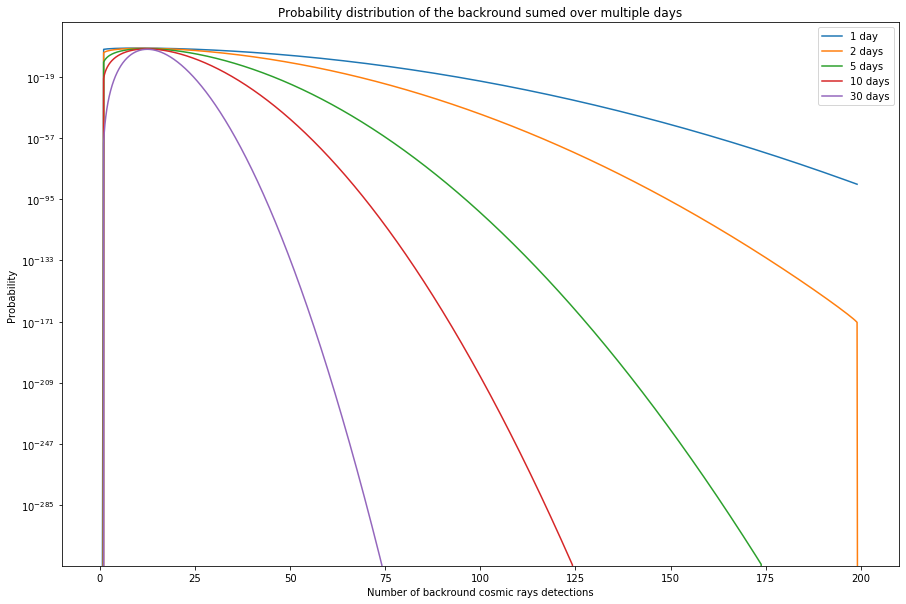

In [68]:
plt.plot(Background, label = "1 day")
n=2
twodaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(twodaysAve[0],twodaysAve[1], label ='2 days')
n=5
fivedaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(fivedaysAve[0],fivedaysAve[1], label ='5 days')

n=10
tendaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(tendaysAve[0],tendaysAve[1], label ='10 days')

n=30
thirtydaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(thirtydaysAve[0],thirtydaysAve[1], label ='30 days')

plt.xlabel('Number of backround cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the backround sumed over multiple days')
plt.legend()
plt.yscale('log')
#plt.xlim([0,8])
plt.show()

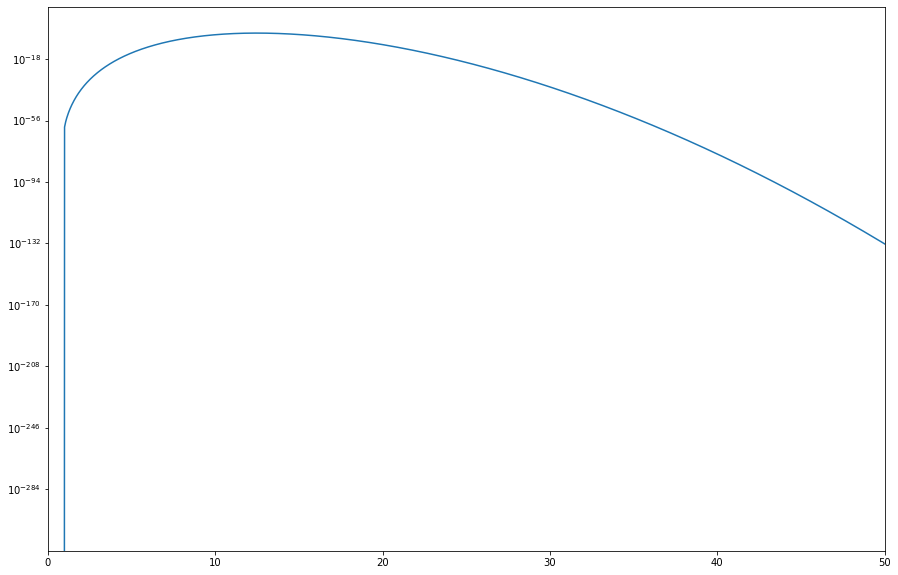

In [35]:
n=30
thirtydaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(thirtydaysAve[0],thirtydaysAve[1], label ='30 days')
plt.xlim([0,50])
plt.yscale('log')

3.
Lets say we have a background Gaussian distibuoin with width of 3, and find a mesurment of value 12! we what to know the problity of the backound priduing a a signal of 12.112 or stronger we will do that below
A)

In [105]:
x = list(range(-120,120))
Backgound = scipy.stats.norm.pdf(x, loc=0, scale=3)
cdf = scipy.integrate.cumtrapz(Backgound)
p = scipy.stats.norm.cdf(12.112, loc=0, scale=3)
p
print('We get a simga of',stats.norm.ppf(p))

We get a simga of 4.037333333333287


B)


In [94]:
mu=np.sqrt(9*10000)
mu

300.0

C)


In [96]:
p = scipy.stats.norm.cdf(12.112, loc=0, scale=300)
p
print('We get a simga of',stats.norm.ppf(p))

We get a simga of 0.04037333333333341


4.
A)


In [100]:
p = stats.norm.cdf(5)
stats.norm.ppf(p,scale=3)

14.999999999910528

B)

In [106]:
p = stats.norm.cdf(5)
stats.norm.ppf(p,scale=300)

1499.9999999910528